In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

In [ ]:
df_equipamento = pd.read_csv('/content/russia_losses_equipment.csv')

In [ ]:
df_soldados = pd.read_csv('/content/russia_losses_personnel.csv')

# **Descrição:**
  Dataset extraida do Kagle sobre a Guerra na Ucrânia, esse dataset descreve a perda de equipamentos Russos,mortalidade e ferimentos das tropas militares russas assim como prisioneiros de guerra russos na guerra Russa da Ucrânia em 2022.

[**2022 Ukraine Russian War Dataset**](https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war)
---

Acronyms
**POW - Prisoner of War,**

**MRL - Multiple Rocket Launcher,**

**APC - Armored Personnel Carrier,**

**SRBM - Short-range ballistic missile,**

**UAV - Unmanned Aerial Vehicle,**

**RPA - Remotely Piloted Vehicle.**



# **Limpeza dos dados:**

In [ ]:
#Verificou-se que as datas estão em String então primeramente vamos converte-las para date object
df_equipamento.date = pd.to_datetime(df_equipamento.date)

In [ ]:
#Existem alguns valores nulos em equipamentos que não foram mais reportados em determinandas datas, devido a isso para não perder as linhas irei colocar colocalos com 0
df_equipamento = df_equipamento.fillna(0,axis = 'columns')

In [ ]:
df_equipamento.info() #Todas as tabelas estão preenchidas com algum valor que não seja Nulo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       252 non-null    datetime64[ns]
 1   day                        252 non-null    int64         
 2   aircraft                   252 non-null    int64         
 3   helicopter                 252 non-null    int64         
 4   tank                       252 non-null    int64         
 5   APC                        252 non-null    int64         
 6   field artillery            252 non-null    int64         
 7   MRL                        252 non-null    int64         
 8   military auto              252 non-null    float64       
 9   fuel tank                  252 non-null    float64       
 10  drone                      252 non-null    int64         
 11  naval ship                 252 non-null    int64         
 12  anti-air

In [ ]:
df_dia_equipamento = df_equipamento.copy()
df_dia_equipamento.columns

Index(['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system', 'greatest losses direction',
       'vehicles and fuel tanks', 'cruise missiles'],
      dtype='object')

In [ ]:
df_dia_equipamento.sort_values(by = 'day',ascending = False, inplace= True)

In [ ]:
df_dia_equipamento.head(10)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles
251,2022-11-03,253,277,258,2734,5552,1755,390,0.0,0.0,1442,16,198,155.0,0.0,0,4162.0,397.0
250,2022-11-02,252,277,258,2714,5525,1733,387,0.0,0.0,1438,16,198,154.0,0.0,Avdiivka and Lyman,4153.0,397.0
249,2022-11-01,251,276,257,2698,5501,1730,383,0.0,0.0,1415,16,197,154.0,0.0,Avdiivka and Bakhmut,4143.0,397.0
248,2022-10-31,250,275,253,2686,5485,1728,383,0.0,0.0,1413,16,197,154.0,0.0,Avdiivka and Lyman,4128.0,352.0
247,2022-10-30,249,274,252,2672,5453,1724,383,0.0,0.0,1412,16,197,154.0,0.0,Donetsk and Lyman,4120.0,352.0
246,2022-10-29,248,273,252,2659,5401,1708,380,0.0,0.0,1406,16,195,152.0,0.0,0,4107.0,351.0
245,2022-10-28,247,272,251,2640,5378,1698,379,0.0,0.0,1401,16,192,151.0,0.0,0,4088.0,351.0
244,2022-10-27,246,271,249,2631,5364,1690,379,0.0,0.0,1398,16,192,150.0,0.0,0,4078.0,351.0
243,2022-10-26,245,271,248,2628,5351,1686,379,0.0,0.0,1379,16,192,149.0,0.0,0,4076.0,350.0
242,2022-10-25,244,271,248,2611,5321,1674,377,0.0,0.0,1372,16,190,149.0,0.0,0,4054.0,350.0


In [ ]:
for i in df_dia_equipamento:
  if(i == 'date' or i == 'day' or i == 'greatest losses direction'):
    continue
  for j in range(len(df_dia_equipamento[i].values)):
   if(i == 'vehicles and fuel tanks' and df_dia_equipamento[i].values[j] == 1796.0):
     df_dia_equipamento[i].values[j] = 1777 - 1796.0
   elif(df_dia_equipamento[i].values[j] == 0):
     df_dia_equipamento[i].values[j] = df_dia_equipamento[i].values[j]
   elif(j == df_dia_equipamento[i].values[-1]):
     df_dia_equipamento[i].values[j] = df_dia_equipamento[i].values[j]
   else:
    df_dia_equipamento[i].values[j] =  df_dia_equipamento[i].values[j] - df_dia_equipamento[i].values[j + 1]

In [ ]:
df_dia_equipamento.head(10)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles
251,2022-11-03,253,0,0,20,27,22,3,0.0,0.0,4,0,0,1.0,0.0,0,9.0,0.0
250,2022-11-02,252,1,1,16,24,3,4,0.0,0.0,23,0,1,0.0,0.0,Avdiivka and Lyman,10.0,0.0
249,2022-11-01,251,1,4,12,16,2,0,0.0,0.0,2,0,0,0.0,0.0,Avdiivka and Bakhmut,15.0,45.0
248,2022-10-31,250,1,1,14,32,4,0,0.0,0.0,1,0,0,0.0,0.0,Avdiivka and Lyman,8.0,0.0
247,2022-10-30,249,1,0,13,52,16,3,0.0,0.0,6,0,2,2.0,0.0,Donetsk and Lyman,13.0,1.0
246,2022-10-29,248,1,1,19,23,10,1,0.0,0.0,5,0,3,1.0,0.0,0,19.0,0.0
245,2022-10-28,247,1,2,9,14,8,0,0.0,0.0,3,0,0,1.0,0.0,0,10.0,0.0
244,2022-10-27,246,0,1,3,13,4,0,0.0,0.0,19,0,0,1.0,0.0,0,2.0,1.0
243,2022-10-26,245,0,0,17,30,12,2,0.0,0.0,7,0,2,0.0,0.0,0,22.0,0.0
242,2022-10-25,244,1,3,21,26,1,2,0.0,0.0,2,0,1,0.0,0.0,0,10.0,0.0


# **Analise descritiva das perdas Russas de equipamentos ao longo da guerra:**


In [ ]:
df_equi_mes = df_dia_equipamento.groupby(pd.Grouper(key='date', freq='1M')).sum()

In [ ]:
df_equi_mes.reset_index(inplace=True)

In [ ]:
meses = {
    0 : 'Fev',
    1 : 'Mar',
    2 : 'Abr', 
    3 : 'Mai',
    4 : 'Jun',
    5 : 'Jul',
    6 : 'Ago',
    7 : 'Set',
    8 : 'Out',
    9 : 'Nov'
     }

In [ ]:
df_equi_mes.rename(index = meses, inplace = True) #Organizando a tabela para melhor visualização

In [ ]:
df_equi_mes.drop(columns = ['date','day'], inplace = True) #Tirando date e day para melhor manipulação da tabela

In [ ]:
df_equi_mes

,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
Fev,29,29,150,816,74,21,291.0,60.0,3,2,5,0.0,0.0,0.0,0.0
Mar,106,102,464,919,237,75,910.0,15.0,80,5,49,22.0,4.0,0.0,0.0
Abr,55,24,394,710,125,55,500.0,1.0,149,1,23,10.0,0.0,0.0,0.0
Mai,18,19,350,857,213,56,0.0,0.0,283,5,16,16.0,0.0,460.0,120.0
Jun,9,11,215,424,141,39,0.0,0.0,126,1,11,13.0,0.0,327.0,23.0
Jul,6,5,190,278,126,13,0.0,0.0,94,1,13,19.0,0.0,300.0,31.0
Ago,11,14,211,308,175,26,0.0,0.0,114,0,35,23.0,0.0,334.0,22.0
Set,30,21,364,620,300,48,0.0,0.0,154,0,24,28.0,0.0,532.0,50.0
Out,11,28,348,553,337,50,0.0,0.0,410,1,21,23.0,0.0,360.0,106.0
Nov,2,5,48,67,27,7,0.0,0.0,29,0,1,1.0,0.0,34.0,45.0


In [ ]:
df_equi_mes['Veículos Terrestres Tripulados'] = df_equi_mes[['tank', 'APC','MRL','military auto','fuel tank','anti-aircraft warfare','mobile SRBM system','vehicles and fuel tanks']].sum(axis = 1)

In [ ]:
df_equi_mes['Equipamento Terrestres Não-Veicular'] = df_equi_mes[["field artillery"]].sum(axis = 1)

In [ ]:
df_equi_mes['Veiculos Aereos Tripulados'] = df_equi_mes[['aircraft','helicopter']].sum(axis = 1)

In [ ]:
df_equi_mes['Veiculos Aereos Não Tripulados'] =  df_equi_mes[['drone']].sum(axis = 1)

In [ ]:
df_equi_mes['Veiculos Navais']  = df_equi_mes[['naval ship']].sum(axis = 1)

In [ ]:
df_equi_mes['Demais tipos de equipamento'] = df_equi_mes[['cruise missiles', 'special equipment']].sum(axis = 1)

1. **Por mês, quantos equipamentos a Rússia perdeu na guerra, dividido entre 
veículos (tripulados ou não) (aereos, terrestres, navais) e não veículos?**



In [ ]:
df_equi_mes[['Veículos Terrestres Tripulados','Equipamento Terrestres Não-Veicular','Veiculos Aereos Tripulados','Veiculos Aereos Não Tripulados','Veiculos Navais','Demais tipos de equipamento']]

,Veículos Terrestres Tripulados,Equipamento Terrestres Não-Veicular,Veiculos Aereos Tripulados,Veiculos Aereos Não Tripulados,Veiculos Navais,Demais tipos de equipamento
Fev,1343.0,74,58,3,2,0.0
Mar,2436.0,237,208,80,5,22.0
Abr,1683.0,125,79,149,1,10.0
Mai,1739.0,213,37,283,5,136.0
Jun,1016.0,141,20,126,1,36.0
Jul,794.0,126,11,94,1,50.0
Ago,914.0,175,25,114,0,45.0
Set,1588.0,300,51,154,0,78.0
Out,1332.0,337,39,410,1,129.0
Nov,157.0,27,7,29,0,46.0


2. **-Por mês, quantos equipamentos aéreos a Russia perdeu (drone, aircraft, helicopter)**

In [ ]:
df_equi_mes[['Veiculos Aereos Tripulados','Veiculos Aereos Não Tripulados']].sum(axis = 1).to_frame(name = 'Perda de Veiculos Aereos por mês')

,Perda de Veiculos Aereos por mês
Fev,61
Mar,288
Abr,228
Mai,320
Jun,146
Jul,105
Ago,139
Set,205
Out,449
Nov,36




3. **Por mês, quantos equipamentos terrestres a Russia perdeu (Military Auto, Tank, Fuel Tank, Vehicles and Fuel Tanks, Armored Personnel Carrier, Multiple Rocket Launcher, Field Artillery, Anti-aircraft warfare, Mobile SRBM System)**

In [ ]:
df_equi_mes[['Equipamento Terrestres Não-Veicular','Veículos Terrestres Tripulados']].sum(axis = 1).to_frame(name = 'Perda de Equipamento Terrestres por mês')

,Perda de Equipamento Terrestres por mês
Fev,1417.0
Mar,2673.0
Abr,1808.0
Mai,1952.0
Jun,1157.0
Jul,920.0
Ago,1089.0
Set,1888.0
Out,1669.0
Nov,184.0


4. **Por mês, quantos demais equipamentos a Russia perdeu (Cruise Missiles, special equipment)**

In [ ]:
df_equi_mes[['Demais tipos de equipamento']].sum(axis = 1).to_frame(name = 'Perda de demais tipos de equipmanetos por mês')

,Perda de demais tipos de equipmanetos por mês
Fev,0.0
Mar,22.0
Abr,10.0
Mai,136.0
Jun,36.0
Jul,50.0
Ago,45.0
Set,78.0
Out,129.0
Nov,46.0


5. **Por mês, quantos equipamentos navais a Russia perdeu (Naval Ship)**

In [ ]:
df_equi_mes[['Veiculos Navais']].sum(axis = 1).to_frame(name = 'Perda de Equipamentos Navais por mês')

,Perda de Equipamentos Navais por mês
Fev,2
Mar,5
Abr,1
Mai,5
Jun,1
Jul,1
Ago,0
Set,0
Out,1
Nov,0


6. **Quais equipamentos foram mais perdidos ao longo da guerra?**

In [ ]:
df_equi_mes.drop(columns = ['Veículos Terrestres Tripulados','Equipamento Terrestres Não-Veicular','Veiculos Aereos Tripulados','Veiculos Aereos Não Tripulados','Veiculos Navais','Demais tipos de equipamento']).sum().sort_values(ascending = False).to_frame('Rank de equipamentos perdidos ao longa da guerra pela Russia')

,Rank de equipamentos perdidos ao longa da guerra pela Russia
APC,5552.0
tank,2734.0
vehicles and fuel tanks,2347.0
field artillery,1755.0
military auto,1701.0
drone,1442.0
cruise missiles,397.0
MRL,390.0
aircraft,277.0
helicopter,258.0


7. **Pra cada mês, qual equipamento mais perdido pela Rússia?**

In [ ]:
df_equi_mes.drop(columns = ['Veículos Terrestres Tripulados','Equipamento Terrestres Não-Veicular','Veiculos Aereos Tripulados','Veiculos Aereos Não Tripulados','Veiculos Navais','Demais tipos de equipamento']).idxmax(axis = 1).to_frame(name = 'Equipamento mais perdido por mês')

,Equipamento mais perdido por mês
Fev,APC
Mar,APC
Abr,APC
Mai,APC
Jun,APC
Jul,vehicles and fuel tanks
Ago,vehicles and fuel tanks
Set,APC
Out,APC
Nov,APC


8. **No mês de Abril a contagem para perda de Carros de Combustivel foi muito abaixo do meses anteriores e logo após este mês a contagem para esse tipo de equipamento foi reclassificada e passou-se a contar junto com a perda de veículos, o que pode ter acontecido foi um acumulo que passou para o mês de Maio, pois possívelmente a contagem já estava sendo modificada ao longo do mês.**

# **Prisioneiros Russos da Guerra da Ucrânia:**

1. **Como está distribuição de prisioneiros de guerra e de soldados mortos russos do inicio da guerra até hoje? Qual é a skew e kurtosis dessas duas distribuições?**

In [ ]:
df_soldados_diario = df_soldados

In [ ]:
df_soldados_diario['date'] = pd.to_datetime(df_soldados_diario['date'])
df_soldados_diario = df_soldados_diario.set_index(['date', 'day', 'personnel*'])
df_soldados_diario = df_soldados_diario.diff().fillna(df_soldados_diario).fillna(0).astype(int).reset_index()
df_soldados_diario

,date,day,personnel*,personnel,POW
0,2022-02-25,2,about,2800,0
1,2022-02-26,3,about,1500,0
2,2022-02-27,4,about,200,0
3,2022-02-28,5,about,800,0
4,2022-03-01,6,about,410,200
...,...,...,...,...,...
247,2022-10-30,249,about,950,0
248,2022-10-31,250,about,620,0
249,2022-11-01,251,about,650,0
250,2022-11-02,252,about,800,0


In [ ]:
df_soldados_diario['personnel'].cumsum()

0       2800
1       4300
2       4500
3       5300
4       5710
       ...  
247    71200
248    71820
249    72470
250    73270
251    74000
Name: personnel, Length: 252, dtype: int64

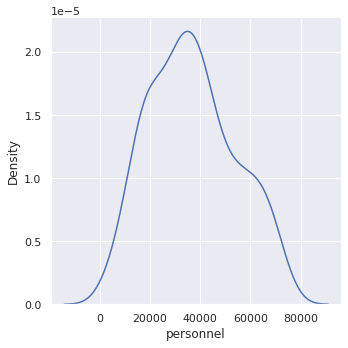

In [ ]:
sns.displot(data = df_soldados.personnel , kind = 'kde')

In [ ]:
df_soldados.personnel.kurtosis()

-0.7477395827775157

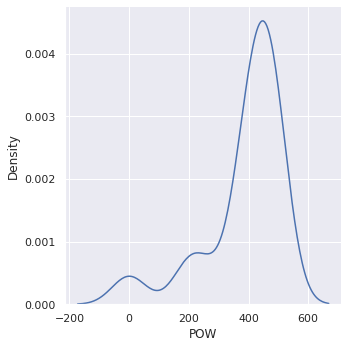

In [ ]:
sns.displot(data = df_soldados.POW, kind = 'kde')

In [ ]:
df_soldados.POW.kurtosis()

2.7688135016585105

No gráfico de distribuição acima há uma assimetria negativa e uma distribuição 

2. **Quais os três meses de mais mortes de soldados russos? E de equipamentos (aereos, terrestres, navais? Há alguma relação entre eles?**

  Os meses de mais mortes de soldados russos são : Março(1º),Setembro(2º),Outubro(3º),Maio(4º)

Os meses de mais destruição de equipamentos : Março,Maio,Setembro,Abril

Há uma clara relação de equipamentos e mortes, pois podemos ver que os 3 meses de maior destruição de equipamentos estão também nos três meses de maior morte, quanto mais equipamentos destruidos mais morte temos, porém outros fatores também influenciam além dos equipamentos. Segue a analise:


In [ ]:
df_soldados_mensal_perdas = df_soldados_diario.drop(columns = ['day','POW']).groupby(pd.Grouper(key='date', freq='1M')).sum()

In [ ]:
df_soldados_mensal_perdas.reset_index(inplace=True)

In [ ]:
df_soldados_mensal_perdas.rename(index = meses, inplace = True)

In [ ]:
df_soldados_mensal_perdas.sort_values(by = 'personnel')

,date,personnel
Nov,2022-11-30,2180
Jun,2022-06-30,5100
Jul,2022-07-31,5230
Fev,2022-02-28,5300
Abr,2022-04-30,5700
Ago,2022-08-31,7070
Mai,2022-05-31,7300
Set,2022-09-30,11180
Mar,2022-03-31,12200
Out,2022-10-31,12740


In [ ]:
df_equi_mes[['Veículos Terrestres Tripulados','Equipamento Terrestres Não-Veicular','Veiculos Aereos Tripulados','Veiculos Aereos Não Tripulados','Veiculos Navais','Demais tipos de equipamento']].sum(axis = 1).to_frame(name = 'Perdas totais de equipamento por mês').sort_values(by= 'Perdas totais de equipamento por mês')

,Perdas totais de equipamento por mês
Nov,266.0
Jul,1076.0
Ago,1273.0
Jun,1340.0
Fev,1480.0
Abr,2047.0
Set,2171.0
Out,2248.0
Mai,2413.0
Mar,2988.0
